In [2]:
import functions as fn 
import adjacency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour_palette import _COLOUR_PALETTE
import pandas as pd

In [7]:
af2_file = "/home/jguven/Downloads/test/af.pdb"

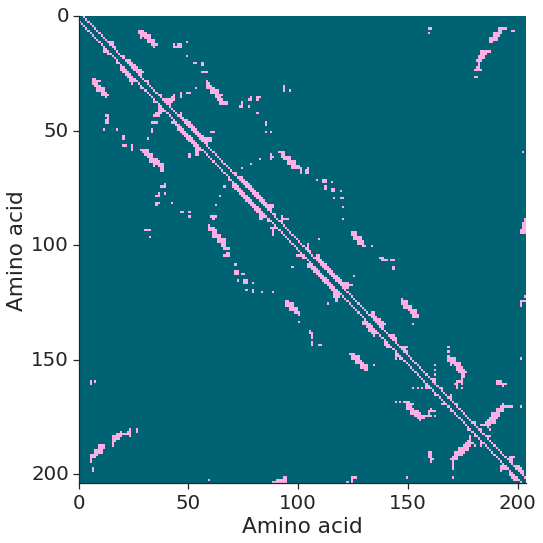

In [8]:
af2_matrix = adjacency.get_pdb_matrix(af2_file)
adjacency_matrix = af2_matrix.copy()
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)

plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8)
colormap = [_COLOUR_PALETTE["NO_CONTACT"], _COLOUR_PALETTE["CONTACT"]]
heatmap = sns.heatmap(adjacency_matrix, cmap=colormap, cbar=False)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(adjacency_matrix[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()

In [24]:
af2_matrix.shape

(204, 204)

In [3]:
template = np.zeros(shape=[204, 204])




In [10]:
shadow_file = pd.read_csv("/home/jguven/Downloads/test/contacts_out", header=None, sep=" ", names=["x1", "r1", "x2", "r2", "d"])
shadow_file.head()
rows = shadow_file["r1"].to_numpy() - 1
columns = shadow_file["r2"].to_numpy() - 1

for i, j in zip(rows, columns):
    template[i, j] = 1
    template[j, i] = 1
    # print(i, j)


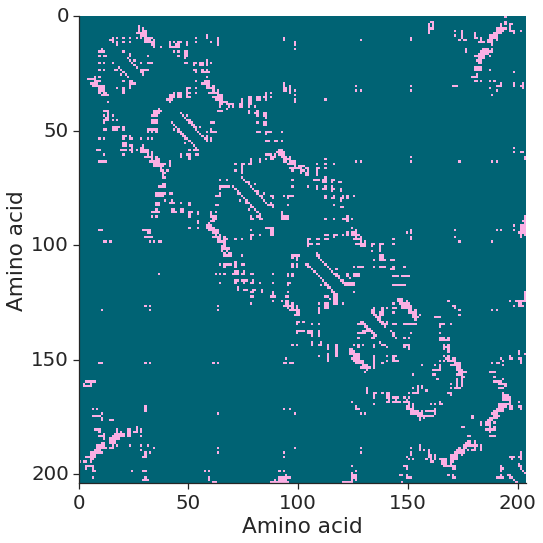

In [12]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(template, cmap=colormap, cbar=False)
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(template[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()